### DataSet Infoemation:
    
    - The data set refers to clients of a wholesale distributor. 
    - It includes the annual spending in monetary units on diverse product categories.

Attribute Information:
    
1- FRESH: annual spending on fresh products (Continuous) 

2- MILK: annual spending on milk products (Continuous)

3- GROCERY: annual spending on grocery products (Continuous)

4- FROZEN: annual spending on frozen products (Continuous) 

5- DETERGENTS_PAPER: annual spending on detergents and paper products (Continuous) 

6- DELICATESSEN: annual spending on and delicatessen products (Continuous)

7- CHANNEL: customers™ Channel - Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal) 

8- REGION: customers™ Region“ Lisnon, Oporto or Other (Nominal)

Descriptive Statistics:
    
(Minimum, Maximum, Mean, Std. Deviation)

FRESH ( 3, 112151, 12000.30, 12647.329) 

MILK (55, 73498, 5796.27, 7380.377) 

GROCERY (3, 92780, 7951.28, 9503.163)

FROZEN (25, 60869, 3071.93, 4854.673)

DETERGENTS_PAPER (3, 40827, 2881.49, 4767.854) 

DELICATESSEN (3, 47943, 1524.87, 2820.106)

REGION Frequency Lisbon 77 Oporto 47 Other Region 316 Total 440

CHANNEL Frequency Horeca 298 Retail 142 Total 440

In [ ]:
eDA and any data cleaning

Implemented Feature Scaling to Normalize the data(compare the histogram and KDE for MinMaxScaler and StandardScaler)

Finding optimal number of features using RFECV and shown the plot between Number of features selected vs Cross validation score (used channel as target variable)

Implemented KMeans Clustering for K=2 to K=15 and based on elbow method identify what is the optimum number of clusters

Implemented PCA with number of original features to answer how much variance is explained by first 2 components and by first 4 components and visualize the clusters in the data

Implemented XGBoost Classifier with 5 Fold CV and report the performance metrics

### Objective:
  - Best describe the variation in the different types of customers that a wholesale distributor interacts with.

In [94]:
import pandas as pd
import numpy as np

In [324]:
data = pd.read_csv("Wholesale customers data.csv")

In [5]:
data.head(3)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844


## EDA(Exploratory Data Analysis)

In [147]:
data.shape

(440, 8)

#### Insights : There are total 440 rows and 8 columns in the dataset.

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


- 6 continuous types of feature ('Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen') 
- 2 categoricals features ('Channel', 'Region')

#### Insights:All columns are in integer value

In [149]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


#### Insights :
        1- Annual spending on fresh products is min 3 and max gets to 112151. that is having huge gap
        2- Same we can fine in Grocery with value min as 3 and max as 92780
        3-Others contineus featre are having big gap in min and max value.

### EDA for discreat value

In [192]:
print("Channel unique values:",data['Channel'].unique())
print("Region unique values",data['Region'].unique())

Channel unique values: [2 1]
Region unique values [3 1 2]


In [151]:
data['Channel'].value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [152]:
data['Region'].value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

- We can see that Channel variable contains values as 1 and 2.

- These two values classify the customers from two different channels as

- 1 for  Horeca (Hotel/Retail/Café) customers and 2 for Retail channel (nominal) customers.

- Region - 3 unique values Lisnon, Oporto or Other (Nominal)

### checking for missing values

In [153]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

## Insights : No missing value in this dataset

In [420]:
data[data.duplicated()]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen


In [154]:
import seaborn as sns
import matplotlib.pyplot as plt

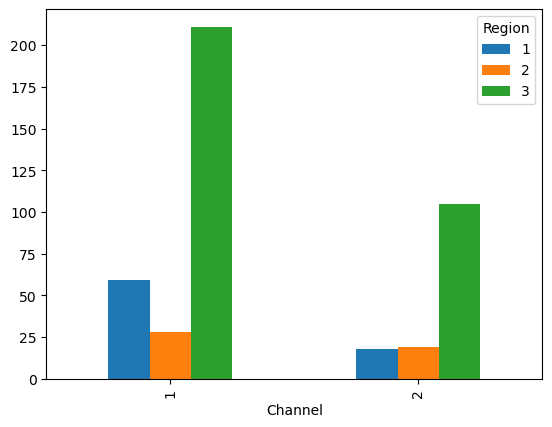

In [193]:
pd.crosstab(data["Channel"],data["Region"]).plot(kind='bar')
plt.show()

#### Insights : we can see channel 1 and 2 both are having max value in region 3 means with others regions

<AxesSubplot:>

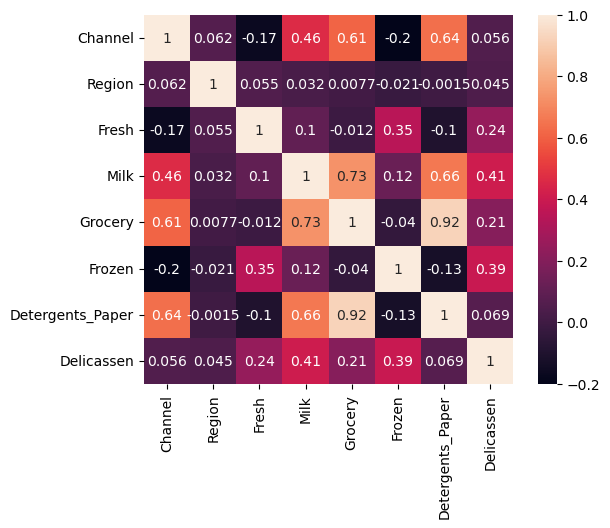

In [194]:
sns.heatmap(data.corr(),square=True,annot=True)

In [195]:
corr_matrix = data.corr().abs()
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack().sort_values(ascending=False))

In [67]:
sol

Grocery           Detergents_Paper    0.924641
Milk              Grocery             0.728335
                  Detergents_Paper    0.661816
Channel           Detergents_Paper    0.636026
                  Grocery             0.608792
                  Milk                0.460720
Milk              Delicassen          0.406368
Frozen            Delicassen          0.390947
Fresh             Frozen              0.345881
                  Delicassen          0.244690
Grocery           Delicassen          0.205497
Channel           Frozen              0.202046
                  Fresh               0.169172
Frozen            Detergents_Paper    0.131525
Milk              Frozen              0.123994
Fresh             Detergents_Paper    0.101953
                  Milk                0.100510
Detergents_Paper  Delicassen          0.069291
Channel           Region              0.062028
                  Delicassen          0.056011
Region            Fresh               0.055287
             

### Insights : 
                1. Grocery and Detergents_Paper are mostly correlated features  -0.92
                2. Milk and Groceries - 0.73
                3. Milk and Detergents_Paper - 0.66

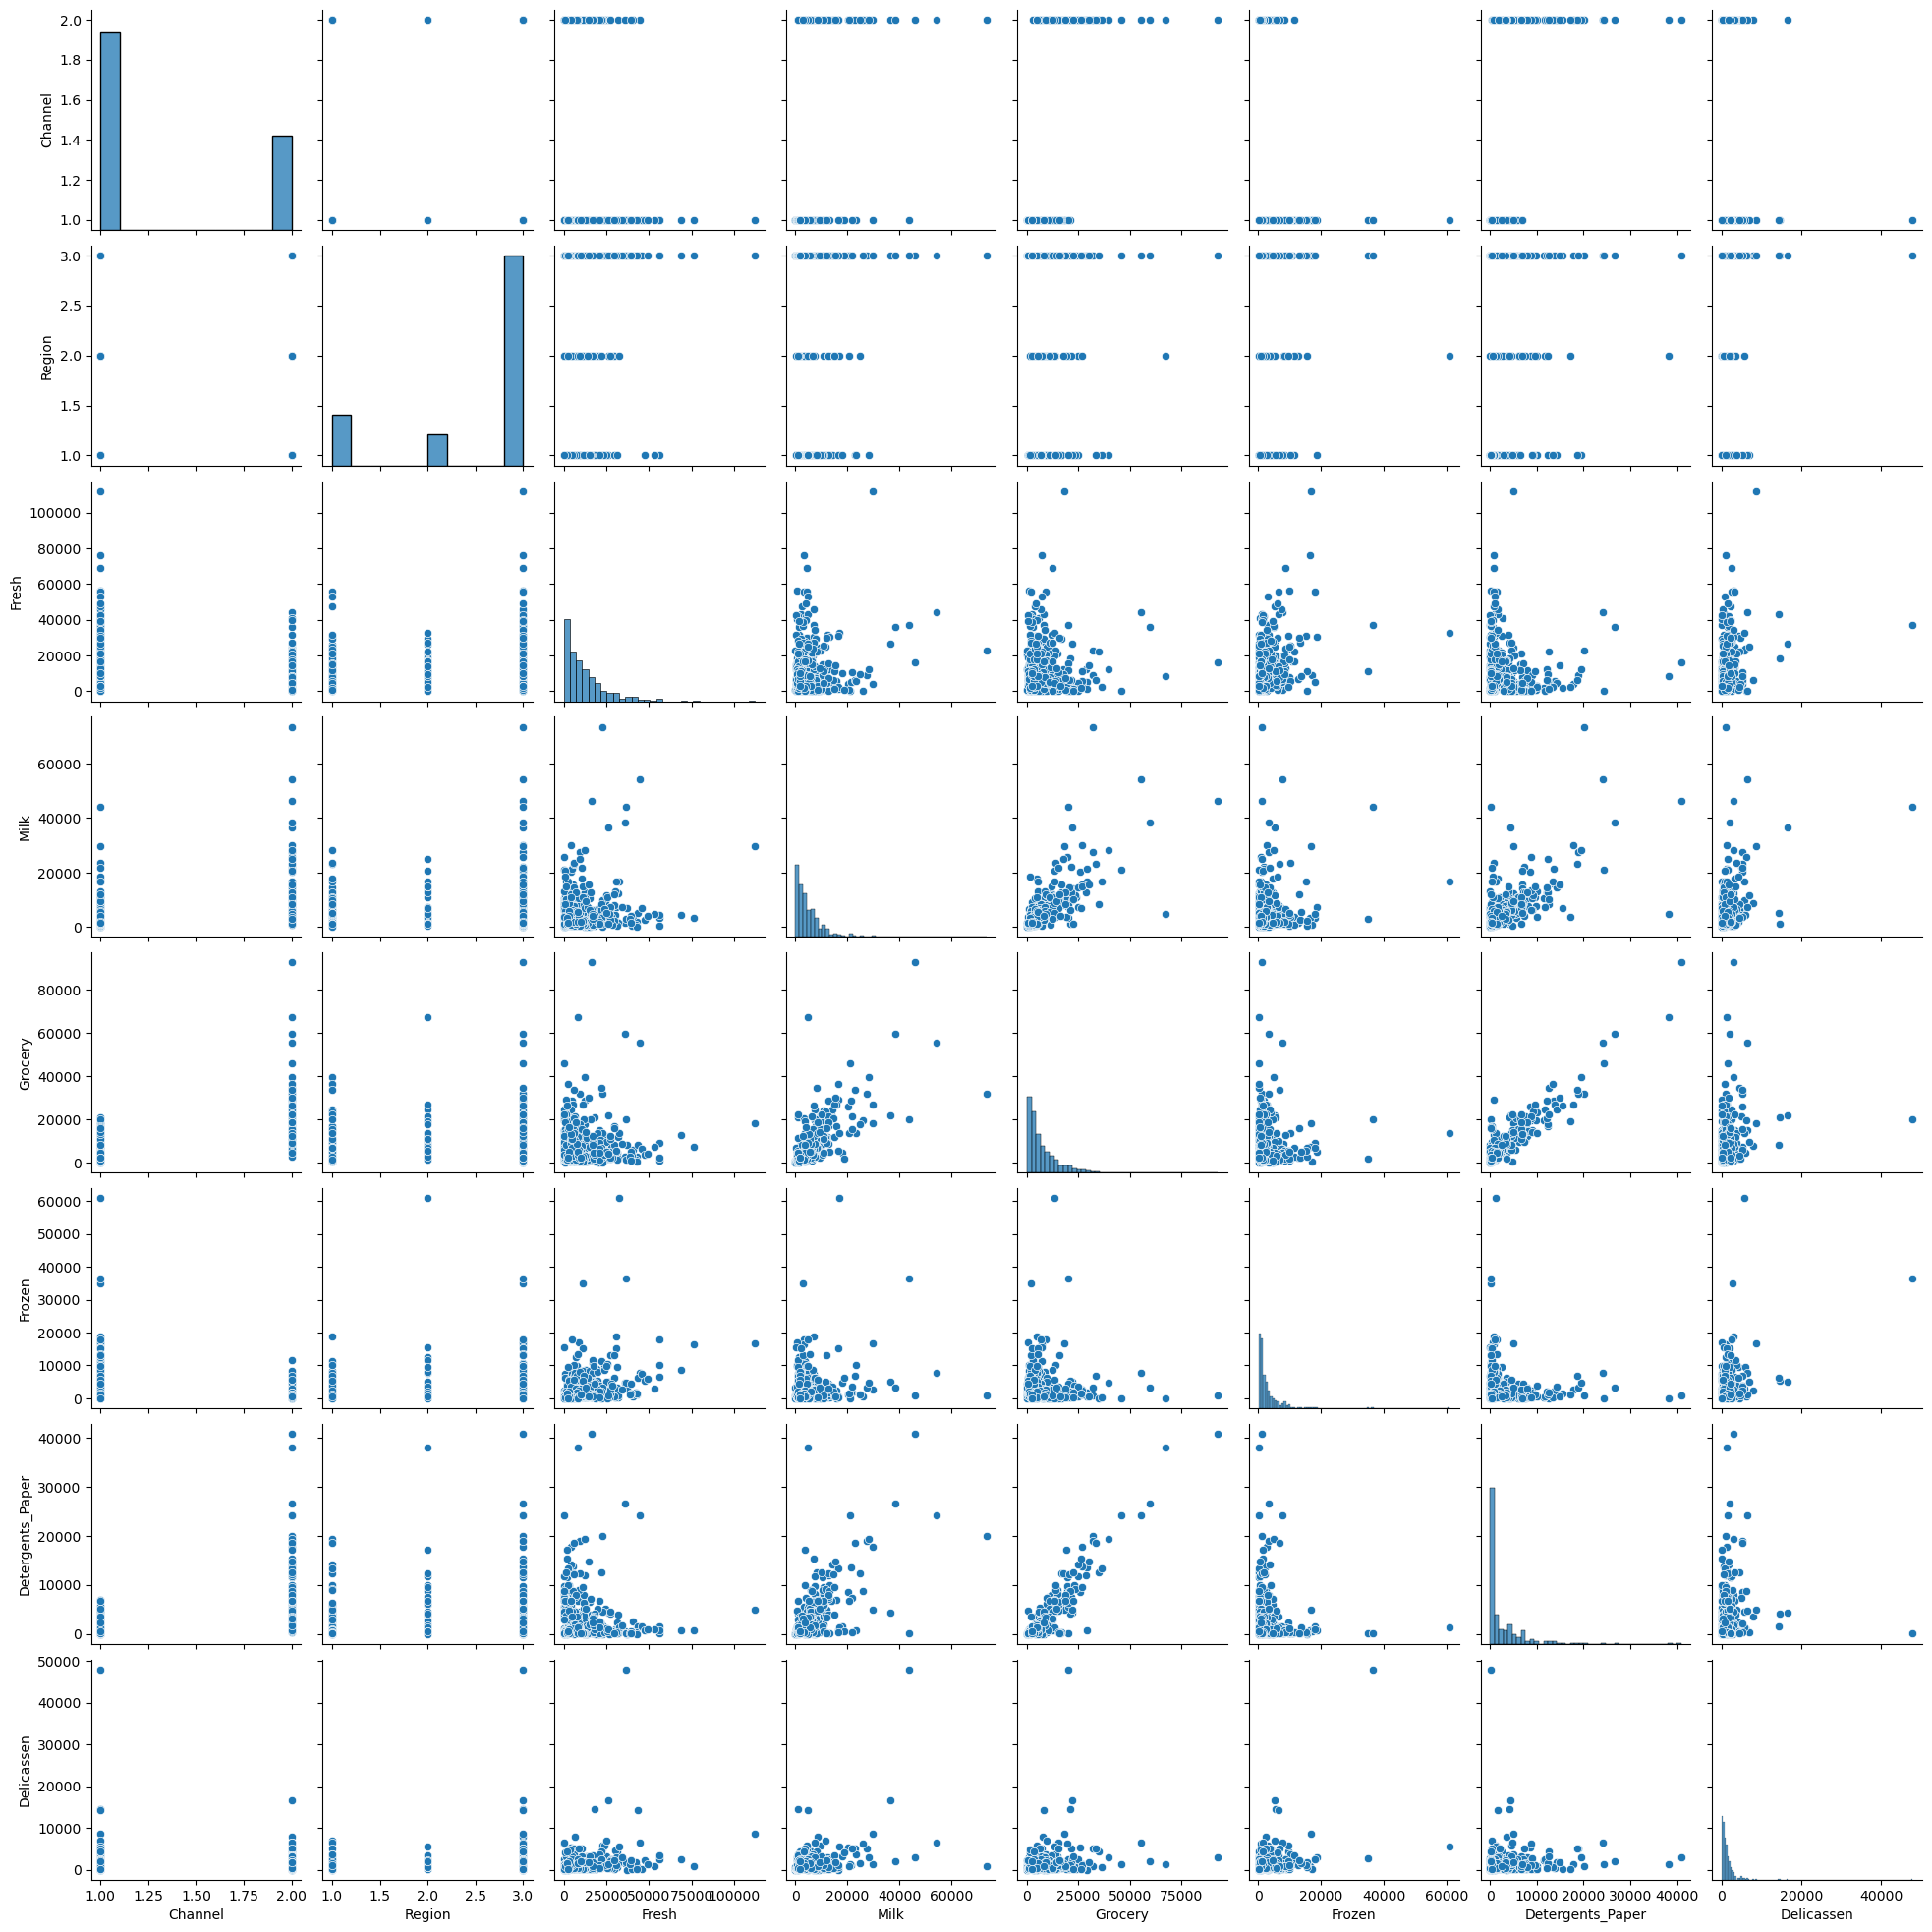

In [196]:
sns.pairplot(data)

Insights :
        - We can see here also clear correlation in Grocery and Detergents_Paper 

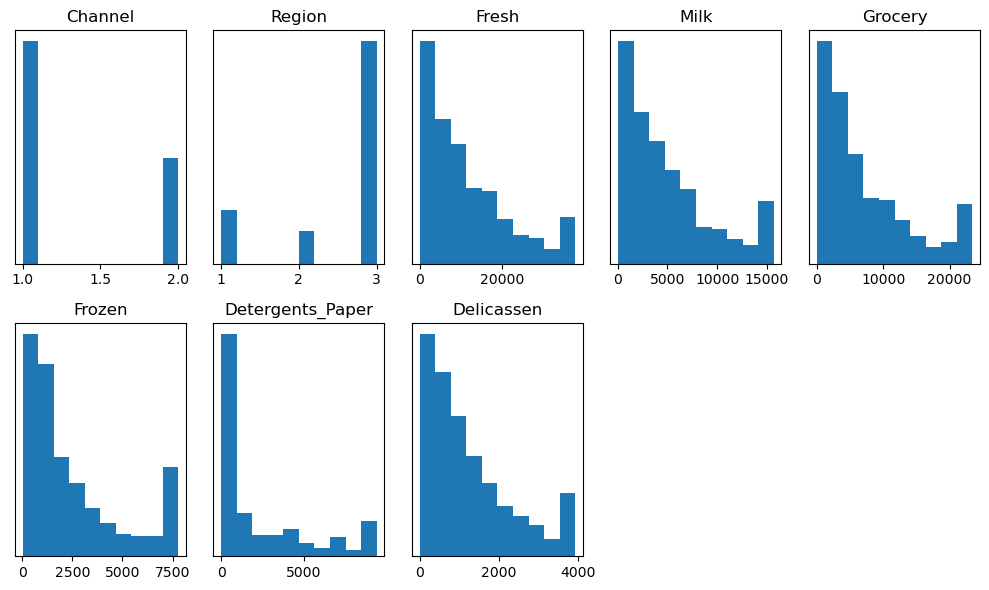

In [422]:
plt.figure(figsize=(10,6))
for i,col in enumerate(data.columns):
    plt.subplot(2,5,i+1)
    plt.title(col)
    plt.hist(data[col])
    plt.yticks(())
    plt.tight_layout()

## Outlier detection

<AxesSubplot:>

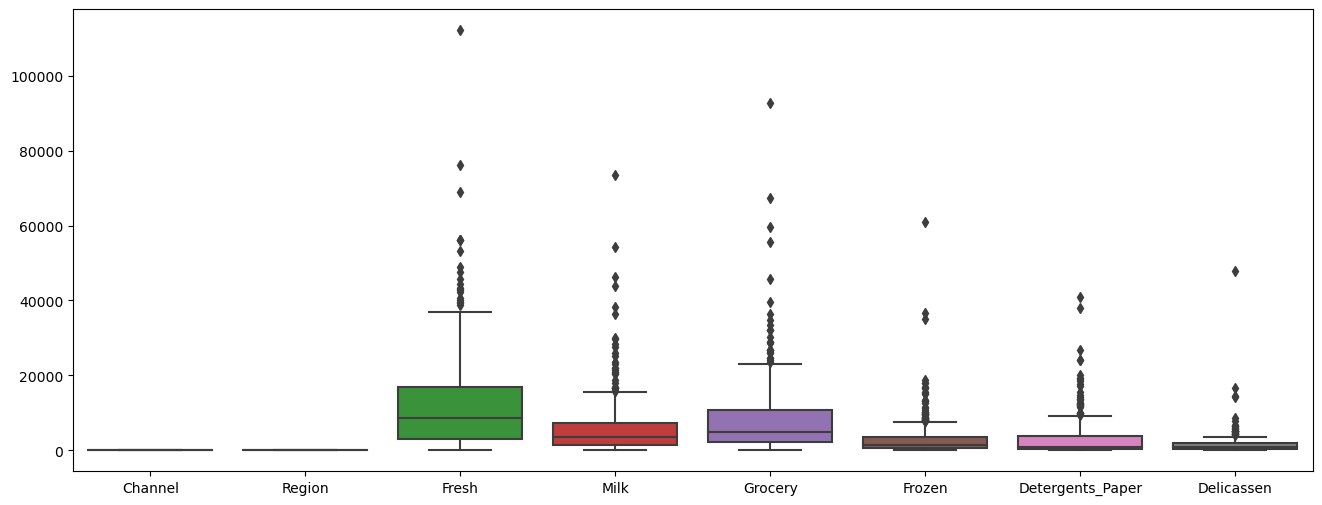

In [197]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=data)

### Get the outlier info from respective feature columns

In [198]:
print ('Fresh Outlier',data['Fresh'].max(),
       '\n','Milk Outlier',data['Milk'].max(),
       '\n','Grocery Outlier',data['Grocery'].max(),
       '\n','Frozer Outlier',data['Frozen'].max(),
      '\n','Delicassen Outlier',data['Delicassen'].max())

Fresh Outlier 112151 
 Milk Outlier 73498 
 Grocery Outlier 92780 
 Frozer Outlier 60869 
 Delicassen Outlier 47943


## Insights :
            - here of some of outlier info which we can collect by using boxplot .
           -  We can use IQR to get outlier info but removing outlier is not the solution as their is possibility to get more outlier after removing previous one.
    

## Data Preprocessing

### 1. Outlier Treatment

In [338]:
from feature_engine.outliers import Winsorizer
win = Winsorizer(capping_method ='iqr',tail='both',fold=1.5,variables=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen'])

In [339]:
data = win.fit_transform(data)

<AxesSubplot:>

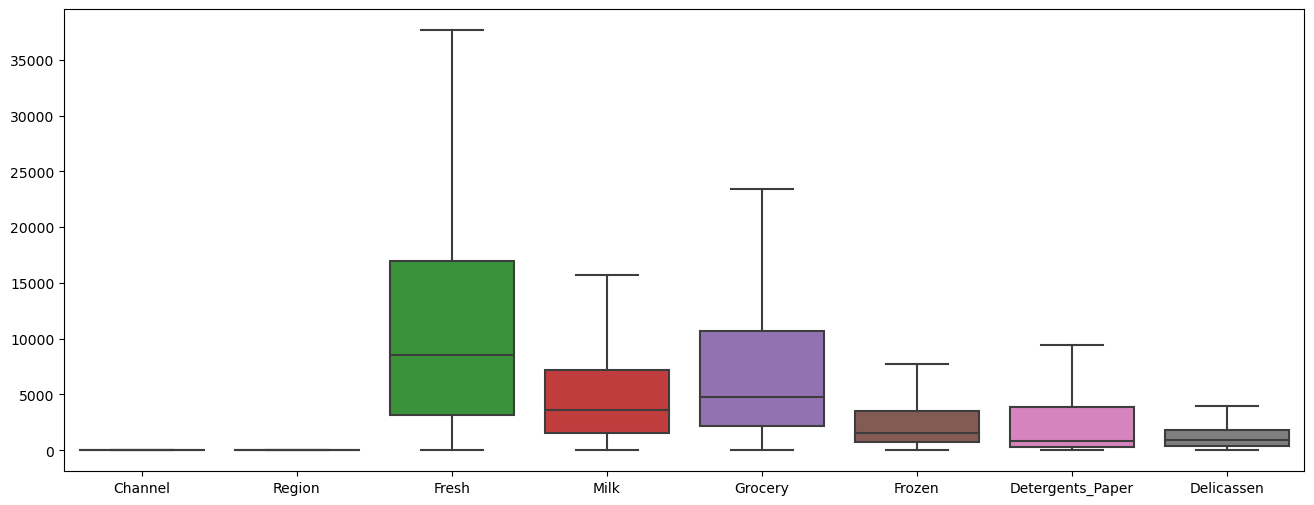

In [340]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=data)


## Data Scaling : data get on the same scale

<AxesSubplot:ylabel='Count'>

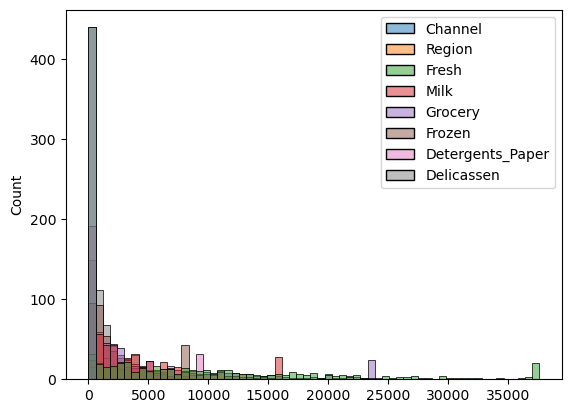

In [202]:
sns.histplot(data)

### Insight :Here we can see data is in right skewd distribution

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

<Figure size 1000x800 with 0 Axes>

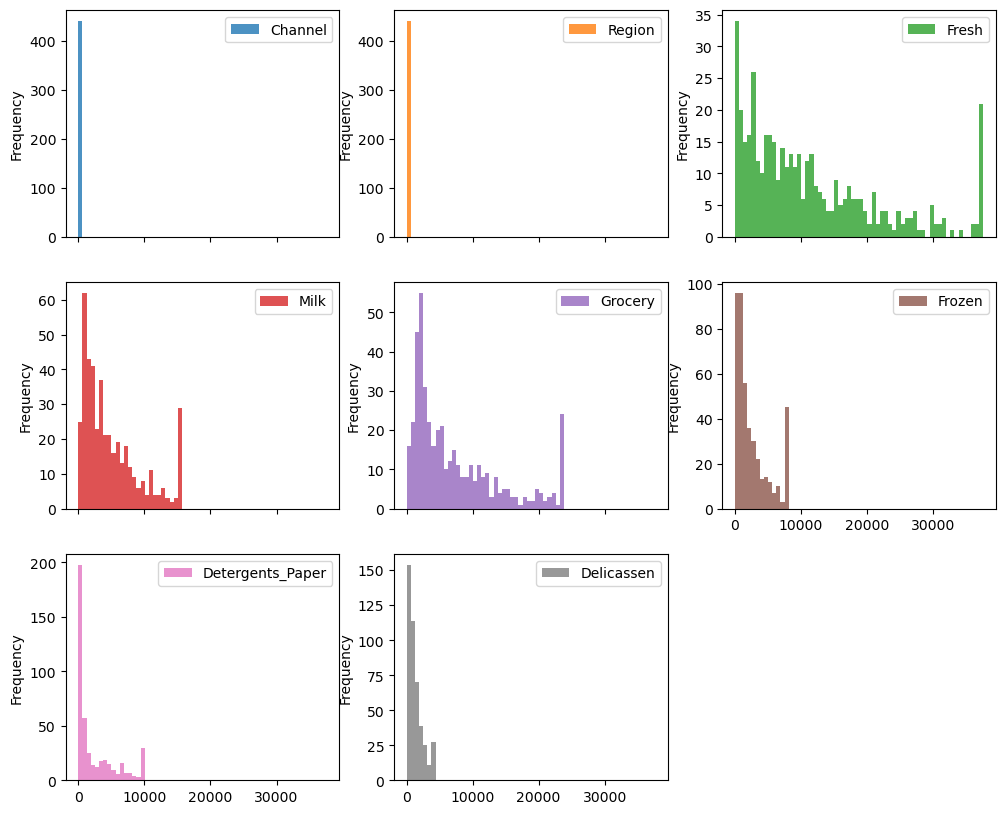

In [281]:
plt.figure(figsize=(10,8))
data.plot(kind='hist', alpha=0.8,bins=60, subplots=True,layout=(3,3),legend=True,figsize=(12,10))

Insights :
       - The histograms show an exponential decline in the number of orders for the respected products. hence this could be a cluster consisting of larger size companies with higher purchase quanitites for these particular items.- 

## Converting the features in categorical Variable

In [254]:
data["Channel"]=data["Channel"].astype('category')
data["Region"] = data["Region"].astype('category')

In [282]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Channel           440 non-null    int64  
 1   Region            440 non-null    int64  
 2   Fresh             440 non-null    float64
 3   Milk              440 non-null    float64
 4   Grocery           440 non-null    float64
 5   Frozen            440 non-null    float64
 6   Detergents_Paper  440 non-null    float64
 7   Delicassen        440 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 27.6 KB


In [341]:
data.head(3)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669.0,9656.0,7561.0,214.0,2674.0,1338.00
1,2,3,7057.0,9810.0,9568.0,1762.0,3293.0,1776.00
2,2,3,6353.0,8808.0,7684.0,2405.0,3516.0,3938.25


In [314]:
X = data.select_dtypes('float64')

In [353]:
X = data.iloc[:,2:8].values

In [354]:
X

array([[12669.   ,  9656.   ,  7561.   ,   214.   ,  2674.   ,  1338.   ],
       [ 7057.   ,  9810.   ,  9568.   ,  1762.   ,  3293.   ,  1776.   ],
       [ 6353.   ,  8808.   ,  7684.   ,  2405.   ,  3516.   ,  3938.25 ],
       ...,
       [14531.   , 15488.   , 23409.875,   437.   ,  9419.875,  1867.   ],
       [10290.   ,  1981.   ,  2232.   ,  1038.   ,   168.   ,  2125.   ],
       [ 2787.   ,  1698.   ,  2510.   ,    65.   ,   477.   ,    52.   ]])

## Data Normalization

In [424]:
X = (X-np.min(X))/(np.max(X)-np.min(X))
X

array([[0.33650595, 0.2564576 , 0.20079836, 0.00560578, 0.07096221,
        0.03546782],
       [0.18740826, 0.26054902, 0.25411965, 0.04673251, 0.08740759,
        0.04710446],
       [0.16870463, 0.23392823, 0.20406618, 0.06381551, 0.09333218,
        0.10455038],
       ...,
       [0.38597493, 0.41140018, 0.62186585, 0.01153036, 0.25018431,
        0.04952211],
       [0.2733015 , 0.05255083, 0.05921931, 0.02749753, 0.00438366,
        0.05637657],
       [0.07396436, 0.04503218, 0.06660512, 0.00164719, 0.01259307,
        0.00130182]])

## K mean Clustering

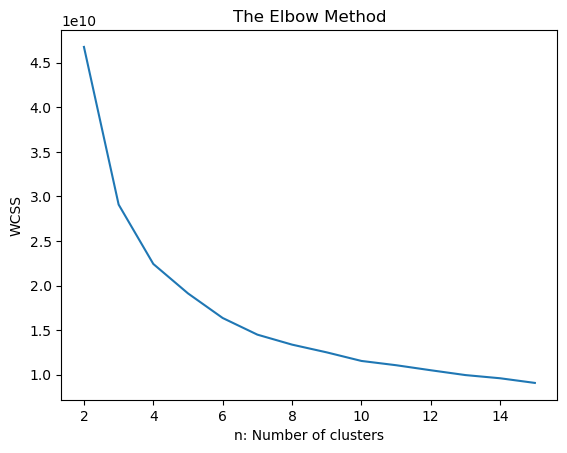

In [368]:
wcss = []
for i in range(2, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) # Standard scaler 
    wcss.append(kmeans.inertia_)
    cluster_labels = kmeans.labels_
    # silhouette score
#     silhouette_avg = silhouette_score(df, cluster_labels)
#     print("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_avg))
plt.plot(range(2, 16), wcss)
plt.title('The Elbow Method')
plt.xlabel('n: Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [369]:
wcss

[46779052303.66911,
 29087986378.554443,
 22423106661.276447,
 19119311642.341476,
 16359157295.251072,
 14492146046.361385,
 13370997395.172375,
 12502722004.385113,
 11540385883.775978,
 11060856737.748848,
 10495660015.792185,
 9953833730.38957,
 9596189792.470009,
 9074072899.038654]

- This graph looks like elbow and we have to(can) determine that elbow point. Here the elbow point comes at around 6 and this our optimal number of clusters for the above data which we should choose. If we look at the figure carefully after 6 when we go on increasing the number of cluster WCSS reduces slightly.

In [454]:
kmeans = KMeans(n_clusters = 6,init= 'k-means++',random_state = 42)
y_means = kmeans.fit_predict(X)


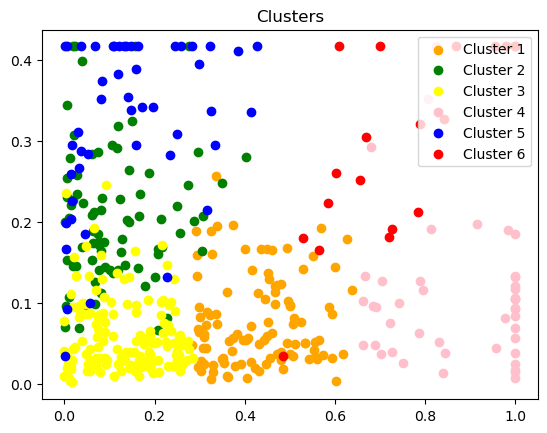

In [457]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='orange', label='Cluster 1')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='green',label='Cluster 2')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='yellow',label='Cluster 3')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='pink',label='Cluster 4')
plt.scatter(X[y_means == 4,0],X[y_means == 4,1],color='blue',label='Cluster 5')
plt.scatter(X[y_means == 5,0],X[y_means == 5,1],color='red',label='Cluster 6')
plt.title("Clusters")
plt.legend(loc='upper right')
plt.show()

## Kmeans_Hierarchical_Clustering

In [391]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669.0,9656.0,7561.0,214.0,2674.0,1338.00
1,2,3,7057.0,9810.0,9568.0,1762.0,3293.0,1776.00
2,2,3,6353.0,8808.0,7684.0,2405.0,3516.0,3938.25
3,1,3,13265.0,1196.0,4221.0,6404.0,507.0,1788.00
4,2,3,22615.0,5410.0,7198.0,3915.0,1777.0,3938.25


In [392]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Channel           440 non-null    int64  
 1   Region            440 non-null    int64  
 2   Fresh             440 non-null    float64
 3   Milk              440 non-null    float64
 4   Grocery           440 non-null    float64
 5   Frozen            440 non-null    float64
 6   Detergents_Paper  440 non-null    float64
 7   Delicassen        440 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 27.6 KB


### Data Preprocessing

In [393]:
from sklearn.preprocessing import normalize
data_norm = normalize(data)
data_norm

array([[1.11821406e-04, 1.67732109e-04, 7.08332695e-01, ...,
        1.19648904e-02, 1.49505220e-01, 7.48085205e-02],
       [1.25321880e-04, 1.87982820e-04, 4.42198253e-01, ...,
        1.10408576e-01, 2.06342475e-01, 1.11285829e-01],
       [1.37802816e-04, 2.06704224e-04, 4.37730645e-01, ...,
        1.65707886e-01, 2.42257350e-01, 2.71350970e-01],
       ...,
       [6.05376936e-05, 9.08065404e-05, 4.39836613e-01, ...,
        1.32274861e-02, 2.85128753e-01, 5.65119370e-02],
       [9.11309417e-05, 2.73392825e-04, 9.37737390e-01, ...,
        9.45939175e-02, 1.53099982e-02, 1.93653251e-01],
       [2.41225630e-04, 7.23676891e-04, 6.72295832e-01, ...,
        1.56796660e-02, 1.15064626e-01, 1.25437328e-02]])

In [394]:
data_norm = pd.DataFrame(data_norm, columns=data.columns)
data_norm.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000138,0.000207,0.437731,0.606884,0.529438,0.165708,0.242257,0.271351
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000080,0.000120,0.903508,0.216139,0.287572,0.156411,0.070994,0.157340


Text(0, 0.5, 'Ecludian Distance')

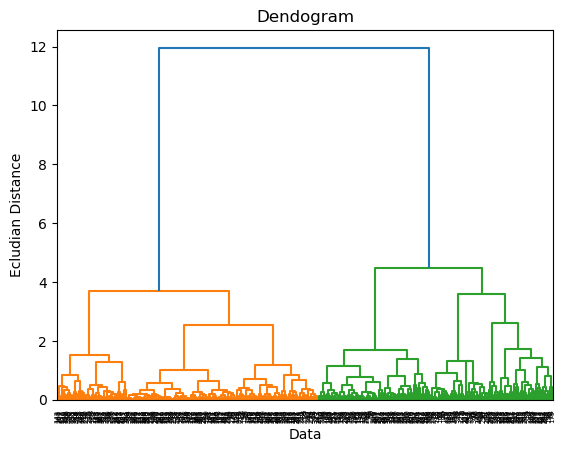

In [459]:
import scipy.cluster.hierarchy as hie
dendogram_1 = hie.linkage(data_norm, method='ward')
dendogram_2 = hie.dendrogram(dendogram_1)
plt.title('Dendogram')
plt.xlabel('Data')
plt.ylabel('Ecludian Distance')

## Agglomerative Clustering Modelling

In [400]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
y_hc=hc.fit_predict(X)

In [401]:
y_hc

array([0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 1, 0, 1, 0, 2, 0, 0, 2, 0, 0,
       1, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 0, 2,
       0, 2, 2, 1, 0, 2, 0, 0, 1, 2, 1, 0, 2, 2, 0, 2, 2, 1, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 1, 1,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 1, 2,
       0, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0,

### Visualization Of Clusters

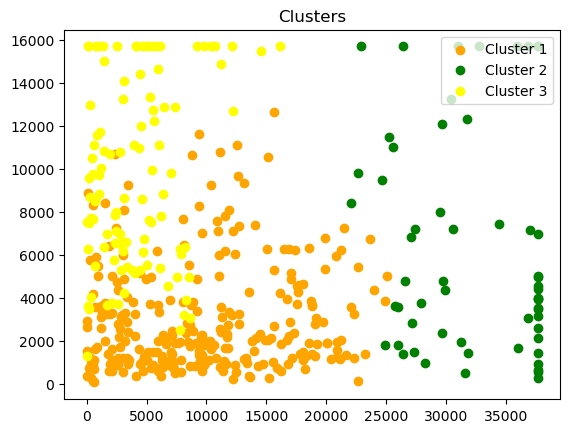

In [415]:
plt.scatter(X[y_hc == 0,0],X[y_hc == 0,1],color='orange', label='Cluster 1')
plt.scatter(X[y_hc == 1,0],X[y_hc == 1,1],color='green',label='Cluster 2')
plt.scatter(X[y_hc == 2,0],X[y_hc == 2,1],color='yellow',label='Cluster 3')
plt.title("Clusters")
plt.legend(loc='upper right')
plt.show()

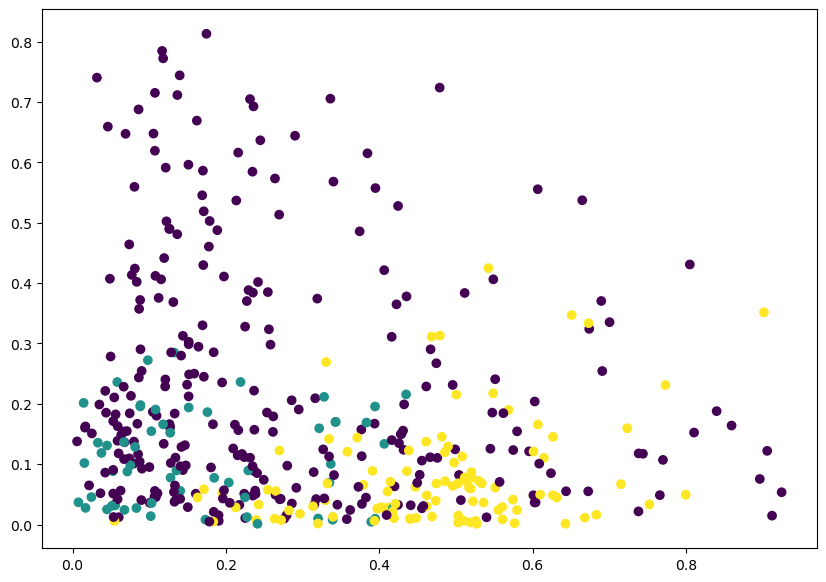

In [411]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_norm['Milk'],data_norm['Frozen'],c=hc.labels_) 

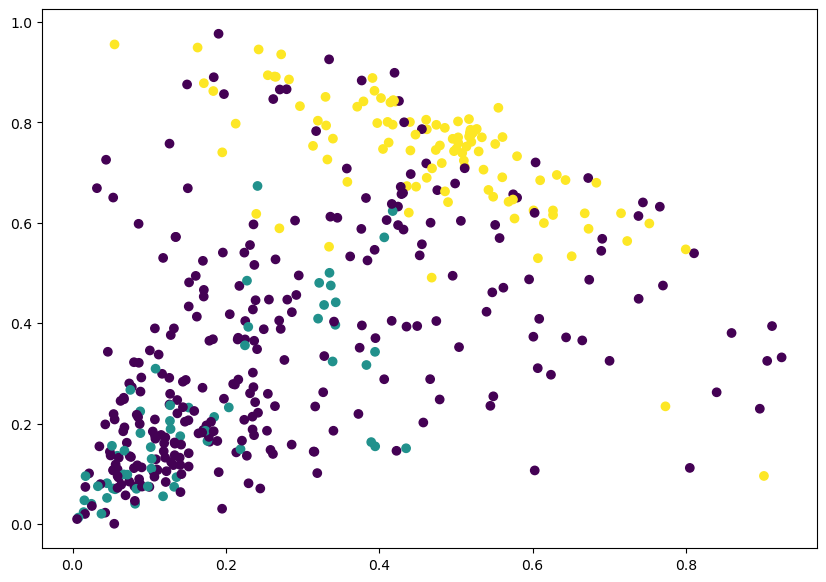

In [410]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_norm['Milk'],data_norm['Grocery'],c=hc.labels_) 

## DBSCAN Algorithm

In [435]:
from sklearn.cluster import DBSCAN
dbs =DBSCAN(eps=0.1,metric='euclidean')
y_dbs = dbs.fit_predict(X)
y_dbs

array([ 0,  0,  0,  0, -1,  0,  0,  0,  0,  1, -1,  0, -1, -1, -1,  0,  0,
        0,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0,  1,  2,  0,  0,  0, -1,
        0,  0, -1, -1, -1,  2, -1,  0, -1,  3,  0,  1,  1, -1,  0,  1,  0,
        0,  2,  0,  0,  0,  1,  0,  0,  0,  0, -1,  0, -1,  0,  1,  0, -1,
        0,  0,  0, -1, -1, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0, -1,  0,  0,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  2,  2,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  1,  0, -1,  0,  0,  0,  0,
        0, -1,  0, -1,  0,  0, -1,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
       -1, -1,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  1,  1, -1,  0,
        0,  3,  0,  0,  0,  1,  0, -1,  0,  0,  0,  0,  1,  0, -1,  0,  0,
        0,  0,  0,  0,  0

## visualization of DBSCAN

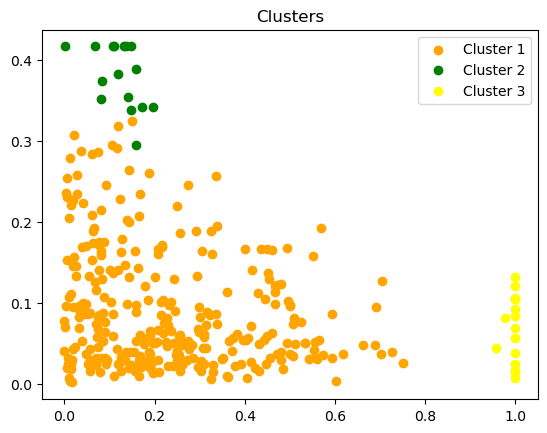

In [436]:
plt.scatter(X[y_dbs == 0,0],X[y_dbs == 0,1],color='orange', label='Cluster 1')
plt.scatter(X[y_dbs == 1,0],X[y_dbs == 1,1],color='green',label='Cluster 2')
plt.scatter(X[y_dbs == 2,0],X[y_dbs == 2,1],color='yellow',label='Cluster 3')
plt.title("Clusters")
plt.legend(loc='upper right')
plt.show()

## Mean shift Algorithm

In [450]:
from sklearn.cluster import MeanShift
ms = MeanShift(bandwidth=0.25,n_jobs=-1)
ms_p = ms.fit_predict(X)
ms_p

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 2, 3, 1, 0, 0, 0, 3, 0, 0, 0,
       1, 2, 3, 0, 0, 0, 3, 1, 3, 0, 1, 1, 0, 0, 1, 3, 0, 1, 1, 0, 3, 3,
       0, 3, 3, 2, 0, 3, 0, 0, 1, 0, 1, 0, 3, 0, 0, 0, 0, 2, 0, 3, 0, 3,
       0, 3, 0, 0, 0, 3, 0, 3, 0, 1, 0, 3, 0, 0, 0, 0, 0, 1, 0, 3, 2, 1,
       0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 3,
       0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 3, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 3, 3, 1, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 3, 1, 3, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

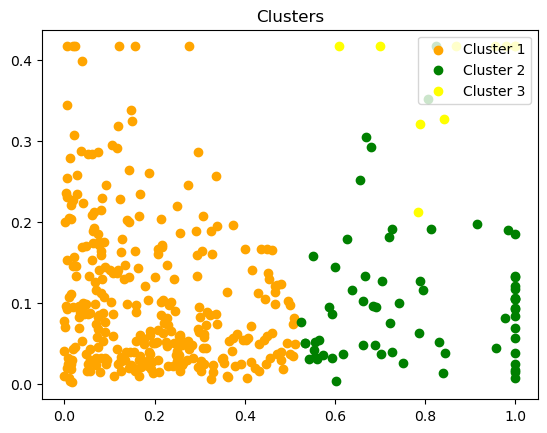

In [451]:
plt.scatter(X[ms_p == 0,0],X[ms_p == 0,1],color='orange', label='Cluster 1')
plt.scatter(X[ms_p == 1,0],X[ms_p == 1,1],color='green',label='Cluster 2')
plt.scatter(X[ms_p == 2,0],X[ms_p == 2,1],color='yellow',label='Cluster 3')
plt.title("Clusters")
plt.legend(loc='upper right')
plt.show()